# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'].astype('f'), train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
class data_vis():
    # creates/plots a histogram , and prints the example count of each classes
    def hist(y_train):
        hist, bins = np.histogram(y_train, bins=n_classes)
        width = 1#0.9 * (bins[1] - bins[0])
        center = (bins[:-1] + bins[1:]) / 2
        plt.bar(center, hist, align='center', width=width)
        plt.show()
        print(np.bincount(y_train))
    
    def image_plot(x,color_scale):
        images_index = np.random.choice(n_train, 3, replace = False)
        images = x[images_index]
        label = y_train[images_index]
        for i, image in enumerate(images_index):
            image = x[image]
            plt.subplot(1, 3, i+1)
            if color_scale == 'gray':
                plt.imshow(image, cmap='gray')
                print(label[i])
            else:    
                plt.imshow(image)
                print(label[i])
plt.show()

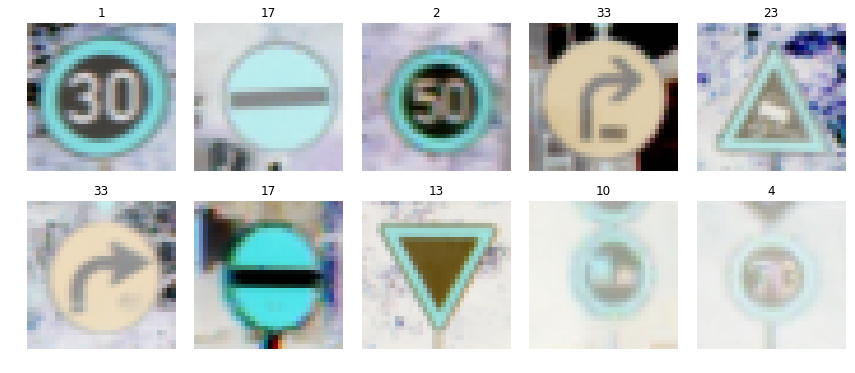

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# show image of 10 random data points
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

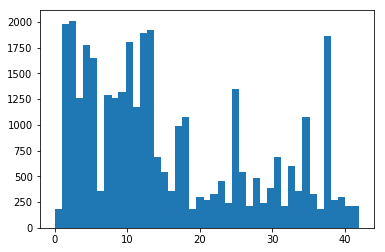

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]


In [5]:
hist_gram = data_vis.hist(y_train) #the dataset is uneven, new data should be generated

First i just plot 10 random pictures. They seem a bit odd, they have a weird shade to them. Then I plot a histogram showing the distributon of the classes. As you can tell they are fairly uneven. Which makes sense because not all signs in the real world are evenyl distributed. 

Number of training examples = 34799

Number of testing examples = 12630

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [22]:
from sklearn.utils import shuffle
from skimage.color import rgb2gray
from sklearn import preprocessing
import cv2
#class for preprocessing data
class pre_proc():
    def shuffle_data(x,y):
        return shuffle(x,y)
    def grayscale(x):
        gray_images = []
        for image in x: 
            
            gray = cv2.cvtColor( image, cv2.COLOR_RGB2GRAY )
            
            gray_images.append(gray)
        
        return np.array(gray_images)
    #normalize teh grayscale changing /b to +-1 from +- .5 increased my accuracy without the additional data
    def normalize_grayscale(image_data):
        a = -1.0
        b = 1.0
        grayscale_min = 0
        grayscale_max = 255
        return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )
       

In [23]:
from numpy import newaxis
#shuffle xtrain and ytrain
X_train, y_train = pre_proc.shuffle_data(X_train, y_train)
X_gray = pre_proc.grayscale(X_train)
#normalize X_train
X_gray = pre_proc.normalize_grayscale(X_gray)



First I grayscaled the images, this might help the network because it will not have to deal with more color channels. 

Also the baseline model article said it increased their accuracy when the imaes were grayscaled.

Next i normalized the data using min max scaling. I did this because it gives the network a better range to learn on and a more normal range to work on. 

In [24]:
X_gray = X_gray[...,newaxis]
print("Updated Image Shape: {}".format(X_gray[0].shape))

Updated Image Shape: (32, 32, 1)


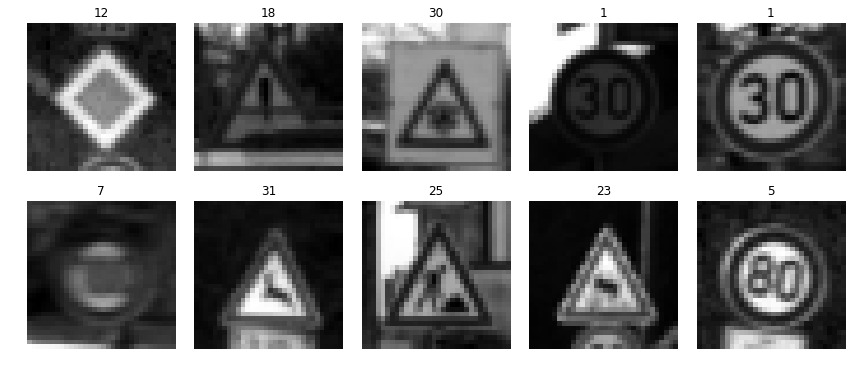

In [25]:
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# show image of 10 random data points
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_gray))
    image = X_gray[index]
    axs[i].axis('off')
    axs[i].imshow(image.squeeze(), cmap='gray')
    axs[i].set_title(y_train[index])

In [26]:
X_valid = pre_proc.grayscale(X_valid)
X_valid = pre_proc.normalize_grayscale(X_valid)
X_valid = X_valid[...,newaxis]
print("Updated Image Shape: {}".format(X_valid[0].shape))

Updated Image Shape: (32, 32, 1)


In [27]:
#histogram equalization; not used
from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank

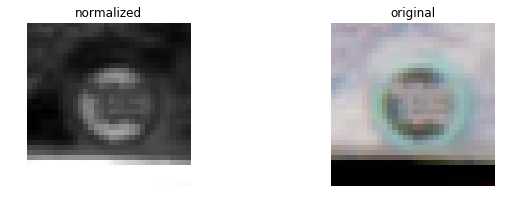

In [28]:
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('normalized')
axs[0].imshow(X_gray[10].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('original')
axs[1].imshow(X_train[10].squeeze(), cmap='gray')

In [29]:

from scipy import ndimage
import random




In [30]:
import matplotlib.pyplot as plt
import random
import matplotlib.gridspec as gridspec
#generate new data
def augment_brightness_camera_images(image):
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    It rotates, translates and shears image and then adjusts brightness
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness 
    

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    img = augment_brightness_camera_images(img)
    
    return img

In [31]:
pics_in_class = np.bincount(y_train)
mean_pics = int(np.mean(pics_in_class))
min_desired = int(mean_pics)
for i in range(len(pics_in_class)):
    
    # Check if less data than the mean
    if pics_in_class[i] < min_desired:
        
        # Count how many additional pictures we want
        new_wanted = min_desired - pics_in_class[i]
        picture = np.where(y_train == i)
        more_X = []
        more_y = []
        
    
      
        # Use the two previous functions to generate data
        for num in range(new_wanted):
            new_img = X_gray[picture][random.randint(0,pics_in_class[i] - 1)]
            new_img = transform_image(new_img, 15, 2, 2)
            new_img = cv2.cvtColor(new_img, cv2.COLOR_RGB2GRAY)
            new_img = new_img[...,newaxis]
            # Rotate images and append new ones to more_X, append the class to more_y
            more_X.append(new_img)
            more_y.append(i)
        
        # Append the pictures generated for each class
        X_gray = np.append(X_gray, np.array(more_X), axis=0)
        y_train = np.append(y_train, np.array(more_y), axis=0)
        
print('Additional data generated.', min_desired, 'pictures.')

Additional data generated. 809 pictures.


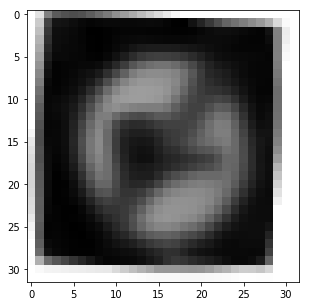

In [18]:
#plot one of the new images

fig = plt.subplots(1, figsize=(5, 5))


index = len(X_gray) - 10
image = X_gray[index]

plt.imshow(image.squeeze(), cmap = 'gray')
plt.show() 

46714
number of training examples = 46714


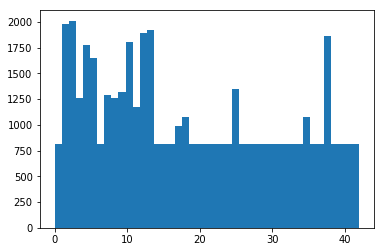

In [19]:
#plot the new histogram with updated data
plt.hist(y_train, bins = n_classes)
print(len(y_train))
updated_n_train = len(X_gray)
X_gray,y_train = shuffle(X_gray, y_train)
print("number of training examples =", updated_n_train)

2.To preprocess the data, I grayscaled it, and then normalized it between -1 and 1. I tried smaller values  like -.5, and .5, but it seemed to not do as well as the final solution. 


I then created new data by using the functions in cell block 12. These functions took in an image and rotated, translated, sheared, and brightened the images. These were all used in the baseline model so i thought it would be a good starting point to increase the accuracy. 

From the histogram above in cell 17, the data is now more vast. We now have 46714 examples. In the baseline model provided I believe it used 120 thousand+ examples. 


### Model Architecture

In [11]:
import tensorflow as tf

EPOCHS = 25
BATCH_SIZE = 128


In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten


In [21]:
#tried to implement the net from the baseline article. 
def neur_net(x):
    mu = 0
    sigma = .1
     #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.dropout(conv1, keep_prob1)
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    #output 5x5x64
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, keep_prob1)
    
    # pool again. Input = 5x5x64 output = 3x3x64
    layer2  = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #flatten layer 2 output: 576
    layer2 = flatten(layer2)
    print("layer2 shape =  ", layer2.shape)
    #3rd con layer output 128
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 64, 128), mean = mu, stddev = sigma))
    conv3_B = tf.zeros(128)
    conv3 = tf.nn.conv2d(conv2, conv3_W,  strides=[1,1,1,1], padding='VALID') + conv3_B
    
    #activation of conv3
    conv3 = tf.nn.relu(conv3)
    
    conv3 = tf.nn.dropout(conv3, keep_prob1)
    
    #flatten layer 3; output is 512
    conv3  = flatten(conv3)
    
    print('conv3 shape: ',conv3.shape)
    #input = 14x14x32 output is 4x4x32
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 4, 4, 1], strides=[1, 4, 4, 1], padding='VALID')
    #output = 512
    conv1 = flatten(conv1)
    print('conv1 shape:  ',conv1.shape)
    
    conv3 = tf.concat([conv3,layer2, conv1], 1)
    
    #dropout to prevent from overfitting
    conv3 = tf.nn.dropout(conv3, keep_prob2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1600.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    logits   = tf.matmul(conv3, fc1_W) + fc1_b
   
    #activation
    logits = tf.nn.relu(logits)
    print('logits shape: ', logits.shape)
    #final layer
    logits = tf.matmul(logits, tf.Variable(tf.truncated_normal(shape=(1024, 43), mean = mu, stddev = sigma))) + tf.Variable(tf.zeros(43))
    

    return logits
    
    

The network has 3 convolutional layers, one fully connected, and the final output layer. Each layer is fed to the next but also fed directly into the fourth layer: fully connected. I did not experiment with the batch size. Padding is Valid for each convolution and max pooling.

1. 5x5 conv size = 32; activation: relu, 2x2 max pool (this layer is also fed into fully connected) Input 32x32x1 output: 28x28x32. pooling layer input is 28x28x32 output is 14x14x6. Then a dropout

2. 5x5 conv size = 64, activation: relu, 2x2 max pool(this layer is also fed into fully connectd layer)
   input:  14x14x32 output: 10x10x64. pooling input: 10x10x64 output: 5x5x64. 
   
3. Layer 2 is then pooled a second time output size 3x3x64

4. 5x5 conv size = 128  activation: relu

5. layer1 layer2 and layer3 are concatanted for input into the fully connected layer

6. dropout; keep_prob = .8

7. fully connected with output = 1024, activation: relu

8. dropout; keep_prob = .5

9. softmax 




 

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [32]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob1 = tf.placeholder(tf.float32)
keep_prob2 = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)
print('done')

done


In [33]:
rate = 0.0001

logits = neur_net(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits( labels = one_hot_y, logits = logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

layer2 shape =   (?, 576)
conv3 shape:  (?, 512)
conv1 shape:   (?, 512)
logits shape:  (?, 1024)


In [34]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1:1.0, keep_prob2: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [35]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_gray)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_gray, y_train = shuffle(X_gray, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_gray[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1:0.8, keep_prob2: 0.5})
        train_acc = evaluate(X_gray, y_train)    
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(train_acc))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess, './trafficnet')
    print("Model saved")

Training...



KeyboardInterrupt: 

For Training:

Batch Size: 100

Epochs: 40

Learning rate: .001

Optimizer: AdamOptimizer

I tried different epochs. I settled on  becuase I got the best result from that however i think 40 might not have been high enough, but it just kind of bumped around between 96 and 97 accuracy until around 35, it continued to increase so I am not really sure how high it could have gone with more epochs. 

The adamoptimizer was used in the previous lesson, and upon further research I read nothing but good things about it. I wanted to try a lower learning rate than the original .001, and it helped a little bit. 

In [60]:
X_test = pre_proc.grayscale(X_test)
X_test = pre_proc.normalize_grayscale(X_test)
X_test = X_test[..., newaxis]

In [61]:

# Launch the model on the test data
with tf.Session() as sess:
    saver.restore(sess, './trafficnet')
    print('Testing...')
    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test, keep_prob1: 1.0, keep_prob2 : 1.0})

print('Test Accuracy: {}'.format(test_accuracy))

Testing...
Test Accuracy: 0.9396674633026123


I started with the LeNet architecture from the previous lessson. This accuracy was not high enough. We were supposed to get the highest accuracy as we could. This architecture is based off of the baseline paper. it consists of three convolutional layers and the final logits layer. its sort of similar to a resnet architecture, based on how they feed layers to the next convolution and also straight to the classifier. its not nearly as deep. They called it multiscale cnn in the paper. I did my best to implement it. They gave a few tips for pooling again after the initial pools of the layers to pass into the fully connected. 

I tried histogram equalization because  I read a paper written by the winner of the traffic sign classification challenge. They said they used that technique, however it did not help my solution. 

I used two dropout layers because I did not want to overfit the data. 

i really want to improve upon this though. I did tons of reading into all different methods, and found this all very exciting. i would like to in the future try batch normalization. before this project i had never implemented a cnn on my own before besides in the previous lesson. One i was intrigued by was a cnn with a spatial transformer inside the network. I was not able to fully understand how these work in the short amount of time since i started the project but hope to do further reserch to see if they are actually useful. I believe researchers at Google  were the ones to release the paper i read. I also believe in the baseline paper they did pre-training. Not sure if that is true. What i gather is that you train the model on some data first and then train it again on more data. Had i more time and more computational resources, I would have loved to try all different architectures. Looking forward to all critiques of my network.

Validation Accuracy: best was 97.8%

Test Accuracy: 96 %

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

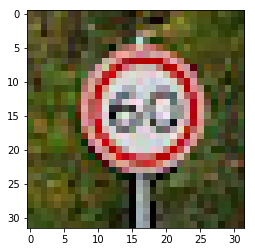

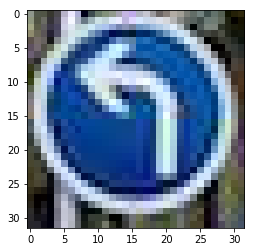

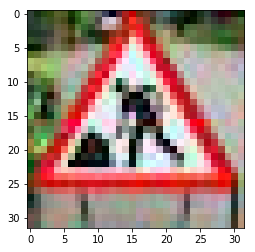

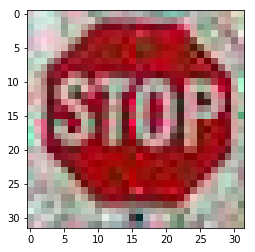

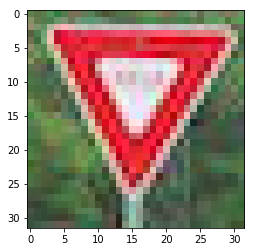

In [63]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg

newpictures = os.listdir("newpictures/")
newpictures = newpictures[1:6]

new_pics = []
for i in newpictures:
    i = 'newpictures/' + i
    image = mpimg.imread(i)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    new_pics.append(image)
    plt.imshow(image)
    plt.show()

The images are very blurry, hopefully the preporcessing will make them more readeable. 

### Predict the Sign Type for Each Image

In [64]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

pictures = np.array(new_pics)


print(pictures.shape)

(5, 32, 32, 3)


In [65]:
new_pics = pre_proc.grayscale(new_pics)
new_pics = new_pics[..., newaxis]

# Normalize
new_pictures = pre_proc.normalize_grayscale(new_pics) 

print('Finished preprocessing additional pictures.')


new_image_shape = new_pictures.shape
print("Processed pictures shape =", new_image_shape)

Finished preprocessing additional pictures.
Processed pictures shape = (5, 32, 32, 1)


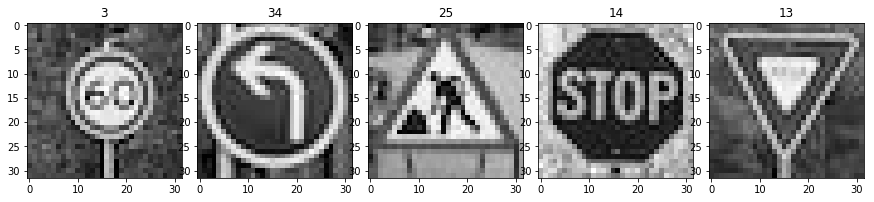

In [66]:
my_labels = [3, 34, 25, 14, 13]

fig, axs = plt.subplots(1,5, figsize=(15, 5))
fig.subplots_adjust(hspace = .2, wspace=.1)
axs = axs.ravel()
for i in range(5):
    
    image = new_pictures[i]
    
    axs[i].imshow(image.squeeze(), cmap='gray')
    axs[i].set_title(my_labels[i])


### Analyze Performance

In [67]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.


with tf.Session() as sess:
    saver.restore(sess, './trafficnet' )
    my_accuracy = evaluate(new_pictures, my_labels)
    print('testing')
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

testing
Test Set Accuracy = 0.400


60% accurate on the pictures i got from the internet. 

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./trafficnet.meta')
    saver.restore(sess, "./trafficnet")
    softmax = sess.run(softmax_logits, feed_dict={x: new_pictures, keep_prob1: 1.0, keep_prob2: 1.0})
    top_k = sess.run(top_k, feed_dict={x: new_pictures, keep_prob1:1.0, keep_prob2: 1.0})
    
      
  
        
    
    

In [ ]:
fig, axs = plt.subplots(len(new_pictures),2, figsize=(12, 14))
fig.subplots_adjust(hspace = .4, wspace=.2)
axs = axs.ravel()

for i, image in enumerate(new_pictures):
    axs[2*i].axis('off')
    axs[2*i].imshow(image.squeeze())
    axs[2*i].set_title('added image')
    guess1 = top_k[1][i][0]
    index1 = np.argwhere(y_valid == guess1)[0]
    axs[2*i+1].axis('off')
    axs[2*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
    axs[2*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*top_k[0][i][0]))

In [ ]:

for i in range(5):
    print('Image', i, 'predictions', my_top_k[1][i], 'percentage', my_top_k[0][i], 'actual', my_labels[i])

1. The images it got wrong were the first and third. The third image looks nothing like the guess but it was 46 percent sure it was whaat it actually was. Same with the first image, it got the third guess right. This could be because the image is not as high of quality as it should be but more than likely the model is not as well rounded as i would like it be. It is not as good on 'real world data'. again, looking forward to any comments. I realy want to have more knowledge on this subject. I welcome the crituiques. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 